# Battle of Movie Genres!

# Imports

In [659]:
# imports
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import os

# Data Load

In [660]:
#os.getcwd()

In [661]:
df = pd.read_csv('movie_data/movies.csv')

In [662]:
#check orignal data
df.head().T

,0,1,2,3,4
name,The Shining,The Blue Lagoon,Star Wars: Episode V - The Empire Strikes Back,Airplane!,Caddyshack
rating,R,R,PG,PG,R
genre,Drama,Adventure,Action,Comedy,Comedy
year,1980,1980,1980,1980,1980
released,"June 13, 1980 (United States)","July 2, 1980 (United States)","June 20, 1980 (United States)","July 2, 1980 (United States)","July 25, 1980 (United States)"
score,8.4,5.8,8.7,7.7,7.3
votes,927000.0,65000.0,1200000.0,221000.0,108000.0
director,Stanley Kubrick,Randal Kleiser,Irvin Kershner,Jim Abrahams,Harold Ramis
writer,Stephen King,Henry De Vere Stacpoole,Leigh Brackett,Jim Abrahams,Brian Doyle-Murray
star,Jack Nicholson,Brooke Shields,Mark Hamill,Robert Hays,Chevy Chase


In [663]:
# check original data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [664]:
#Checked for percent and total missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=["Count","%"]
missing.sort_values(by=["%","Count"], ascending = False)

,Count,%
budget,2171,28.312467
gross,189,2.464789
rating,77,1.004173
company,17,0.221701
runtime,4,0.052165
score,3,0.039124
votes,3,0.039124
writer,3,0.039124
country,3,0.039124
released,2,0.026082


In [665]:
#drop columns not needed
df = df.drop(columns = ['budget', 'votes', 'writer', 'country', 'released', 'star', 'director'])

In [666]:
#drop entries with missing values
df = df.dropna()

In [667]:
# update year to datetime object
df['year']= pd.to_datetime(df['year'], format = "%Y")

In [668]:
#check unique genres
df.genre.unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Animation', 'Romance', 'Music',
       'Western', 'Thriller', 'Sci-Fi', 'Mystery', 'Sport', 'Musical'],
      dtype=object)

In [669]:
#check count of unique genres
df.genre.value_counts()

genre
Comedy       2183
Action       1666
Drama        1440
Crime         536
Biography     429
Adventure     419
Animation     332
Horror        304
Fantasy        42
Mystery        20
Thriller       12
Family         10
Romance         8
Sci-Fi          8
Western         3
Music           1
Sport           1
Musical         1
Name: count, dtype: int64

In [670]:
#combine rare genres into genre: Other 
df.genre = df.genre.replace(['Fantasy', 'Family', 'Western', 'Sci-Fi','Romance', 'Thriller', 'Mystery', 'Sport', 'Musical','Music'], 'Other')

In [671]:
# update column names to proper case
df.rename(str.title, axis='columns', inplace = True)

In [672]:
#update gross revenue into millions rounded by 2 decimal points
df['Gross'] = round(df['Gross']/1000000,2)

In [673]:
#update column names
df.rename(columns={'Name':'Movie', 'Gross':'Gross (Million USD)'}, inplace =True)

In [674]:
#check final dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7415 entries, 0 to 7659
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Movie                7415 non-null   object        
 1   Rating               7415 non-null   object        
 2   Genre                7415 non-null   object        
 3   Year                 7415 non-null   datetime64[ns]
 4   Score                7415 non-null   float64       
 5   Gross (Million USD)  7415 non-null   float64       
 6   Company              7415 non-null   object        
 7   Runtime              7415 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 521.4+ KB


The following exploration is for 7415 movies released from 1980 to 2020

# Visuals

In [676]:
#set custom color palette based on movie genre
custom_palette=dict(Drama="darkcyan", Adventure="royalblue", Action="firebrick",Comedy ="gold" , Horror="indigo", Biography="darkgoldenrod"
             , Crime="dimgray", Other="darkolivegreen", Animation="darkkhaki" )

# Which movie genre is most common?

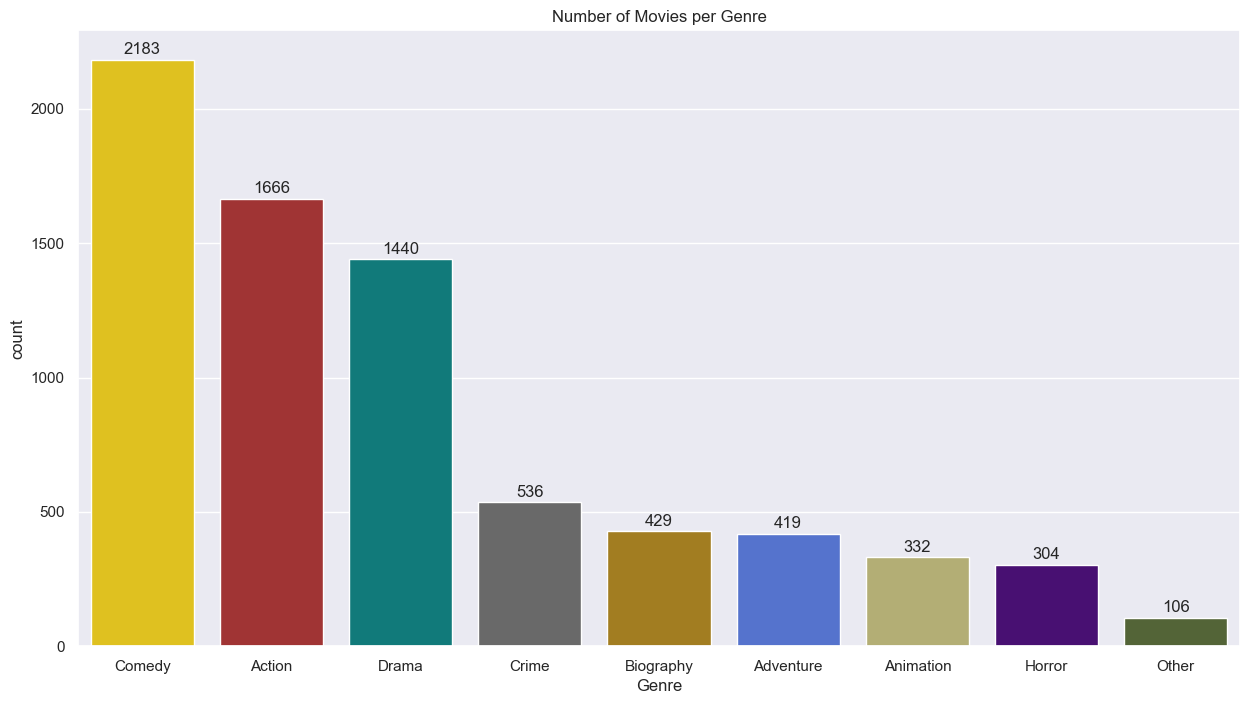

In [677]:
sns.set(rc={'figure.figsize':(15,8)})
ax= sns.countplot(x='Genre',data=df, hue = 'Genre', legend=False, palette = custom_palette ,order=df['Genre'].value_counts().index)
ax.set(title='Number of Movies per Genre') # title

 # label count plot
for p in ax.patches:
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label
 y = height+20, # y-coordinate position of data label
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

# Which movie genre gets best IMDB scores?

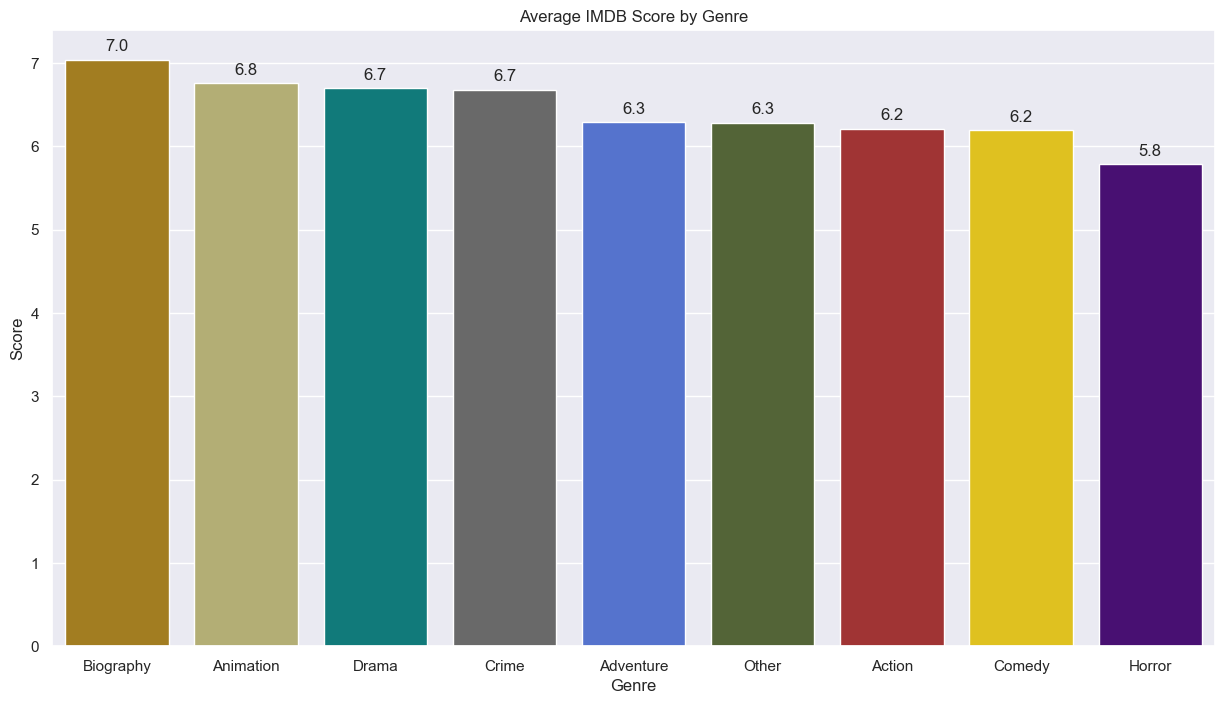

In [678]:
# plot vertical barplot
df_agg = df.groupby(['Genre'])['Score'].mean().reset_index().sort_values('Score')

sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(data = df_agg, x='Genre', y='Score', errorbar = None
                 , hue = 'Genre', legend=False, palette = custom_palette, order=df_agg.sort_values(by='Score', ascending = False).Genre)
ax.set(title='Average IMDB Score by Genre') # title barplot


# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.1, # y-coordinate position of data label, padded 100 above bar
 s = '{:.1f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

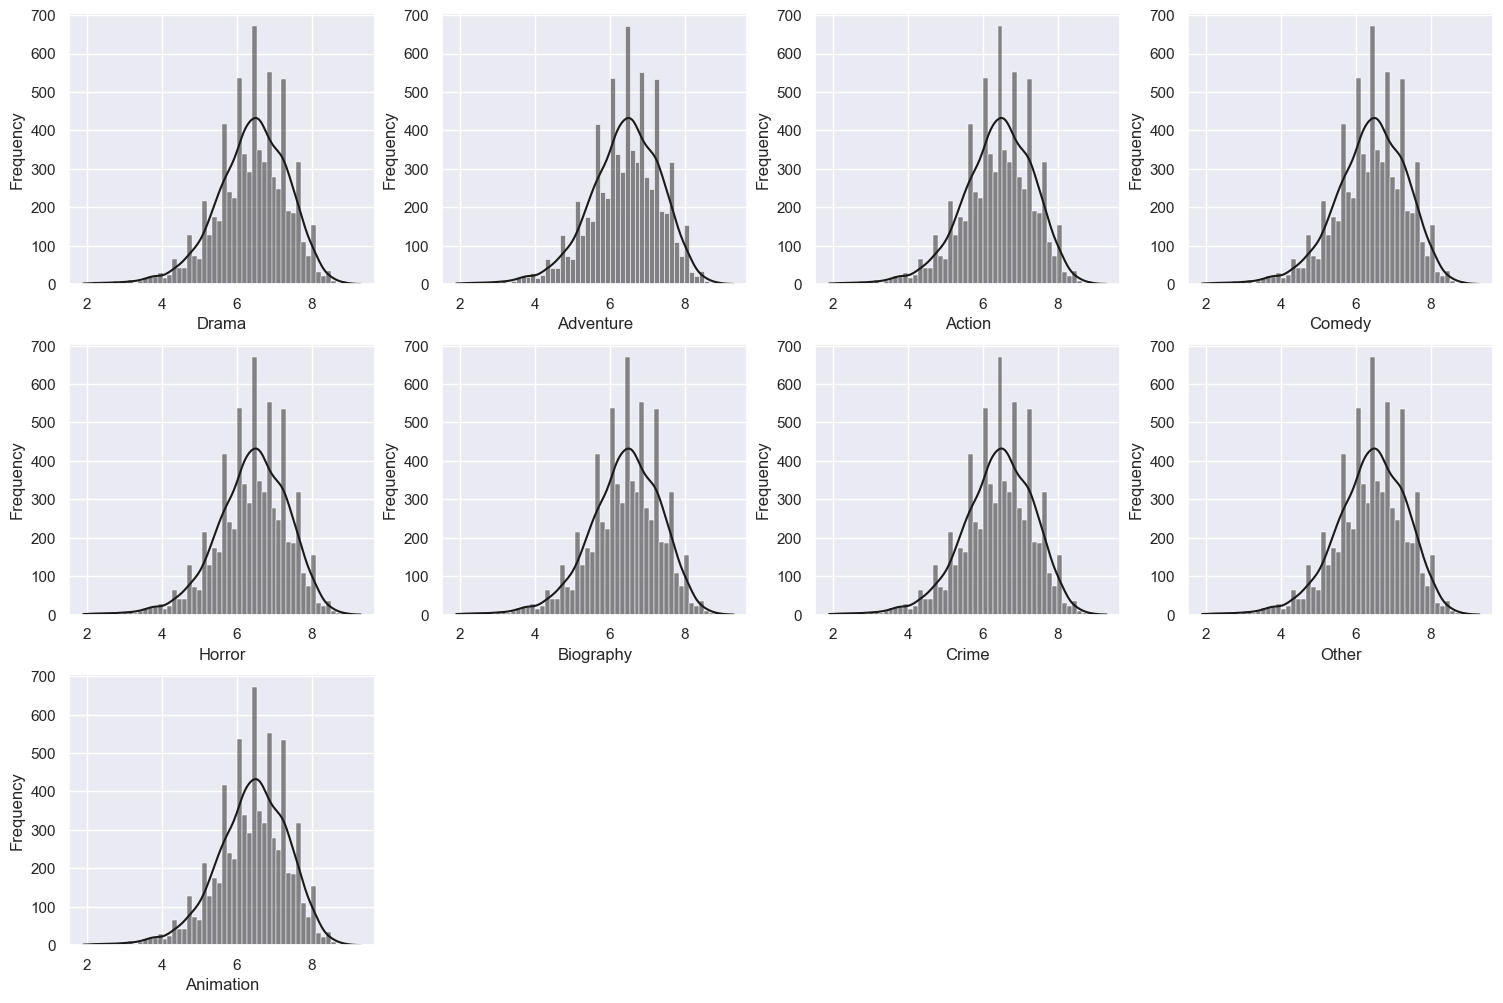

In [679]:
#Histogram with kernel density function to check spread of IMDB scores for different genres
plt.figure(figsize = (15,10))
for i in enumerate(df['Genre'].unique()):
    plt.subplot(3, 4, i[0]+1)
    sns.histplot(x = 'Score', data = df, kde=True, color ='k')
    plt.tight_layout(pad=0.5)
    plt.gca().set(xlabel= i[1],ylabel='Frequency') 

# Which movie genre has the shortest movies?

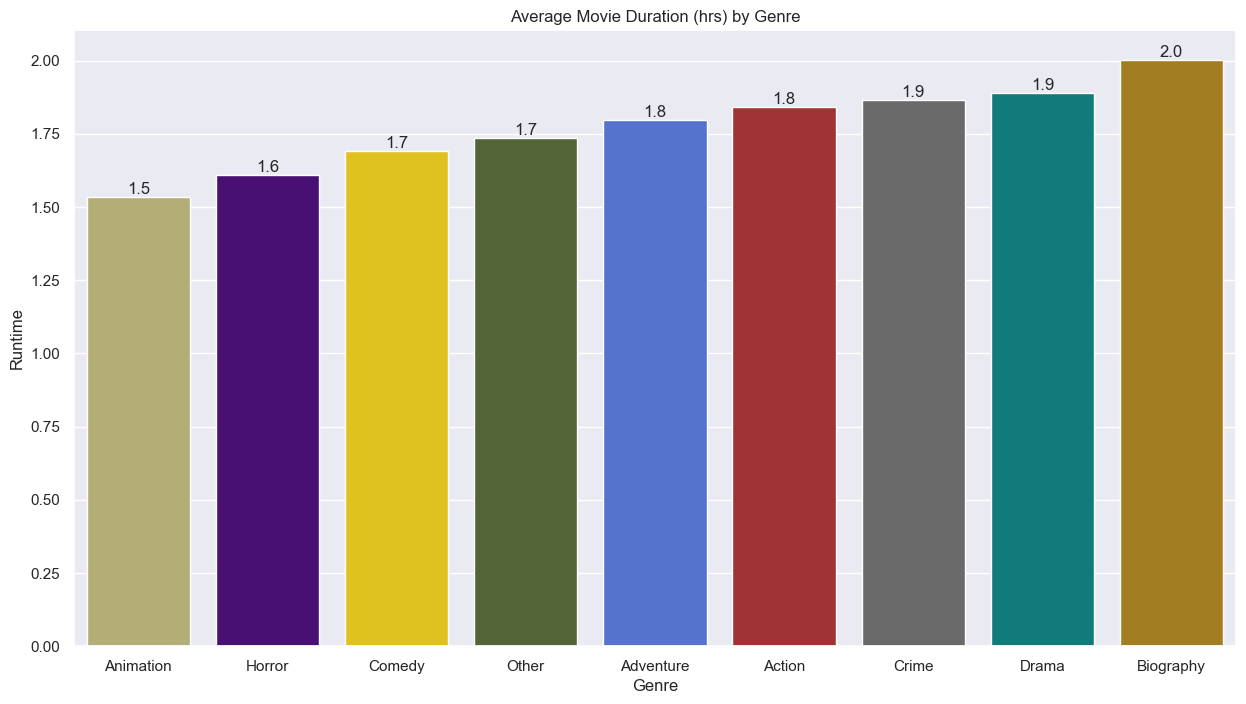

In [680]:
df_agg = df.groupby(['Genre'])['Runtime'].mean().reset_index().sort_values('Runtime')
df_agg['Runtime'] = df_agg['Runtime']/60

# plot vertical barplot
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(data = df_agg, x='Genre', y='Runtime', errorbar = None
                 , hue = 'Genre', legend=False, palette = custom_palette, order=df_agg.sort_values(by='Runtime').Genre)
ax.set(title='Average Movie Duration (hrs) by Genre') # title barplot


# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.01, # y-coordinate position of data label, padded 100 above bar
 s = '{:.1f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

# Which movie genre makes the most revenue?

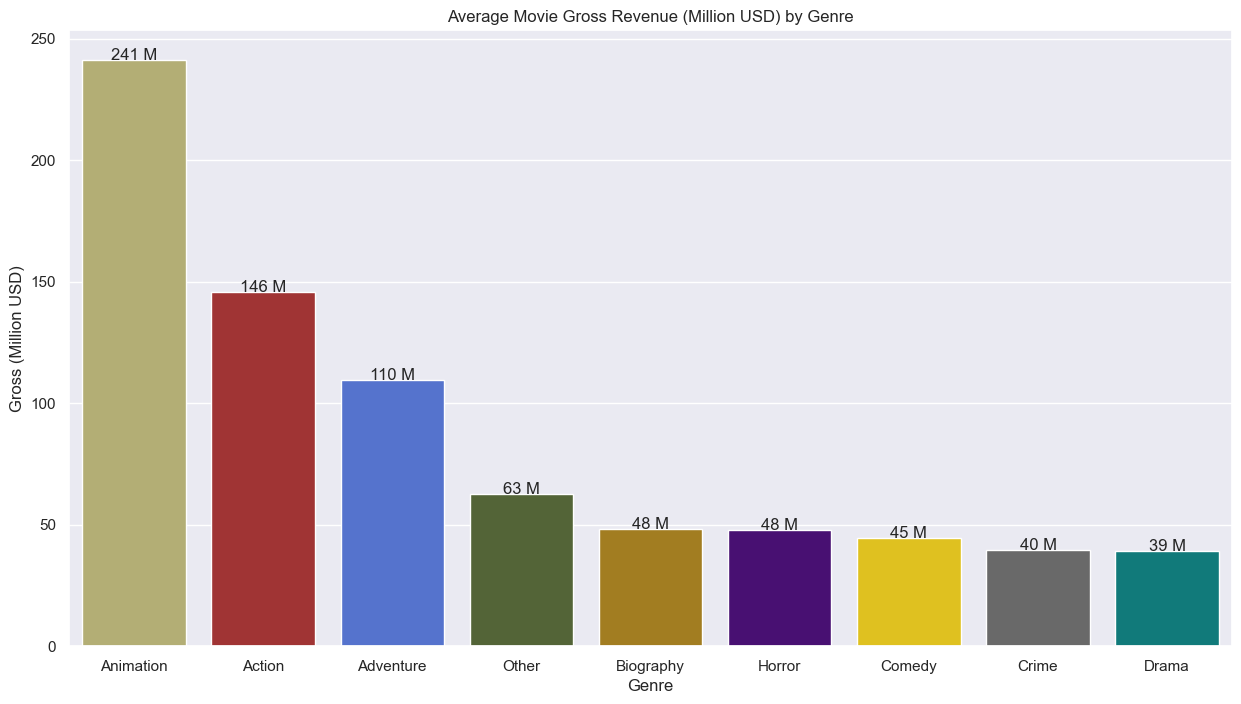

In [681]:
df_agg = df.groupby(['Genre'])['Gross (Million USD)'].mean().reset_index()

# plot vertical barplot
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(data = df_agg, x='Genre', y='Gross (Million USD)', errorbar = None
                 , hue = 'Genre', legend=False, palette = custom_palette, order=df_agg.sort_values(by='Gross (Million USD)', ascending = False).Genre)
ax.set(title='Average Movie Gross Revenue (Million USD) by Genre') # title barplot


# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.01, # y-coordinate position of data label, padded 100 above bar
 s = '{:1.0f}'.format(height) + ' M', # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

In [713]:
df_temp = df.copy()
df_temp['Year'] = df_temp['Year'].dt.year

df_temp[['Movie','Year', 'Genre', 'Gross (Million USD)' ]][df_temp['Genre']=='Animation'].sort_values(by='Gross (Million USD)', ascending = False).head(10)

,Movie,Year,Genre,Gross (Million USD)
7480,The Lion King,2019,Animation,1670.73
7494,Frozen II,2019,Animation,1450.03
6262,Frozen,2013,Animation,1281.51
7281,Incredibles 2,2018,Animation,1244.64
6688,Minions,2015,Animation,1159.44
2448,The Lion King,1994,Animation,1083.72
7488,Toy Story 4,2019,Animation,1073.39
5685,Toy Story 3,2010,Animation,1066.97
7140,Despicable Me 3,2017,Animation,1034.80
6908,Finding Dory,2016,Animation,1028.57


# How did movie scores change overtime?

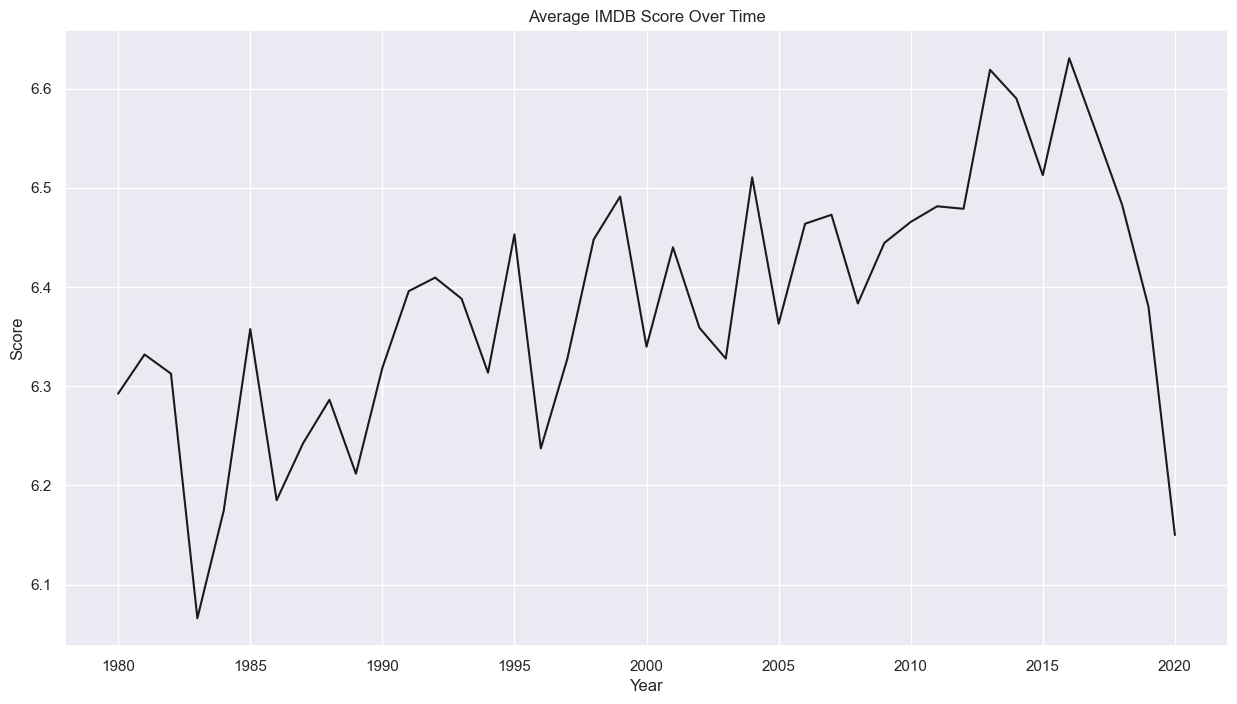

In [683]:
# plot line graph
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.lineplot(data=df, x= 'Year', y='Score', errorbar=None, color='k')
ax.set(title='Average IMDB Score Over Time');

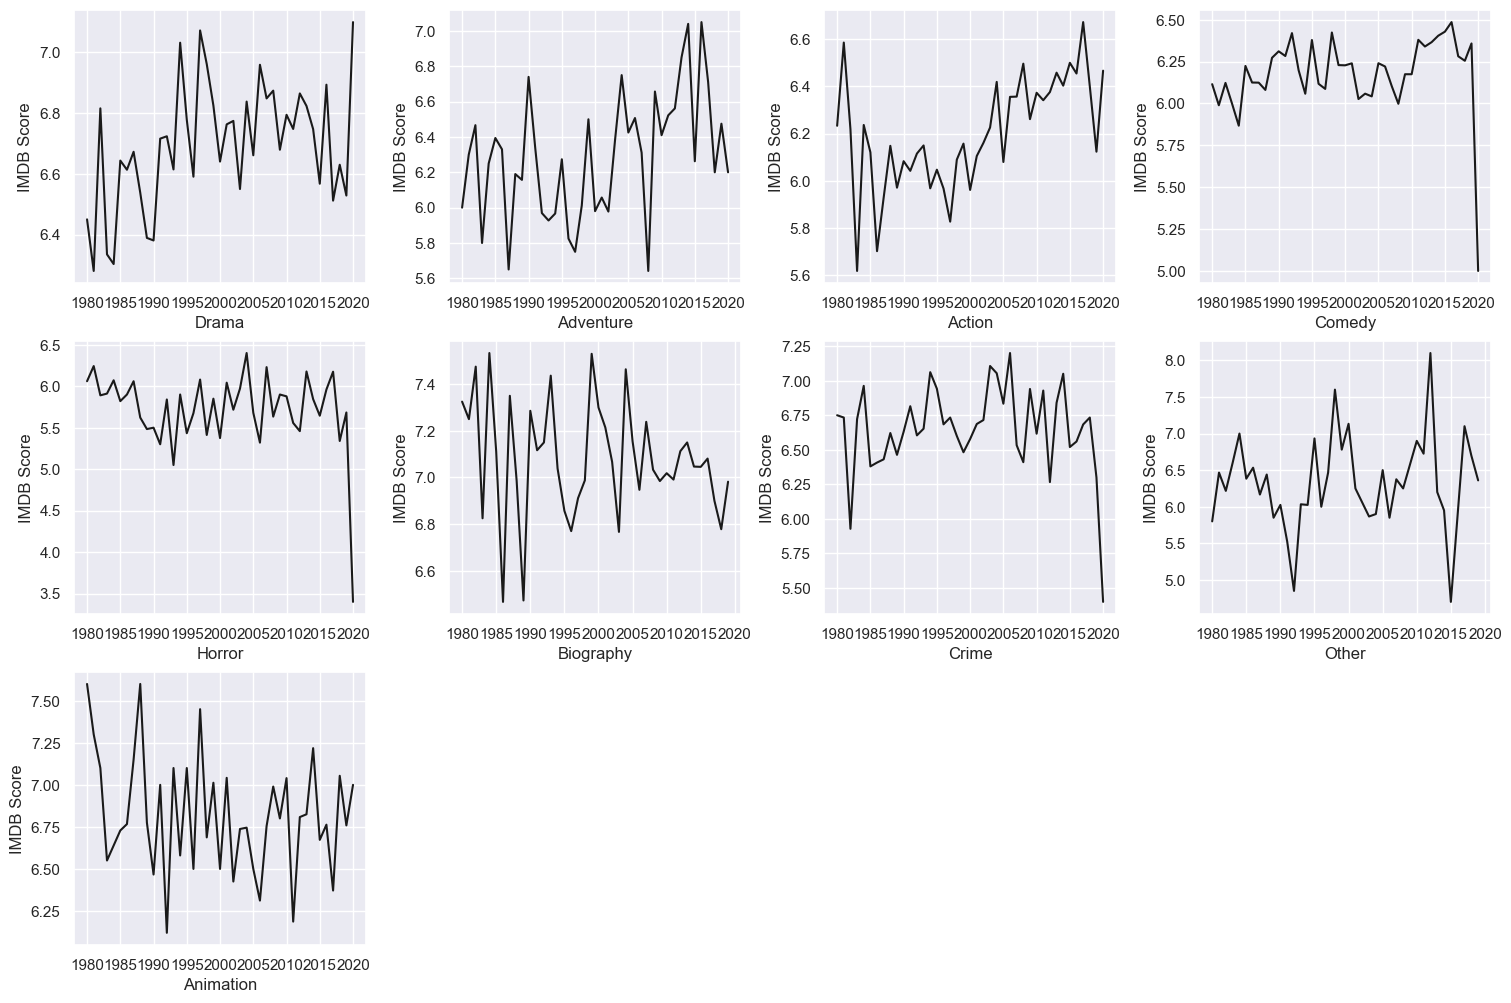

In [684]:
#Histogram with kernel density function of all numerical features to understand spread
plt.figure(figsize = (15,10))
for i in enumerate(df['Genre'].unique()):
    plt.subplot(3, 4, i[0]+1)
    sns.lineplot(data=(df[df['Genre'] == i[1]]), x= 'Year', y='Score', errorbar=None, color ='k')
    plt.tight_layout(pad=0.5)
    plt.gca().set(xlabel= i[1],ylabel='IMDB Score') 
#plt.title('Histplot for all numerical features', x=-0.5 ,y=3.50)    

# How did movie runtime change over time?

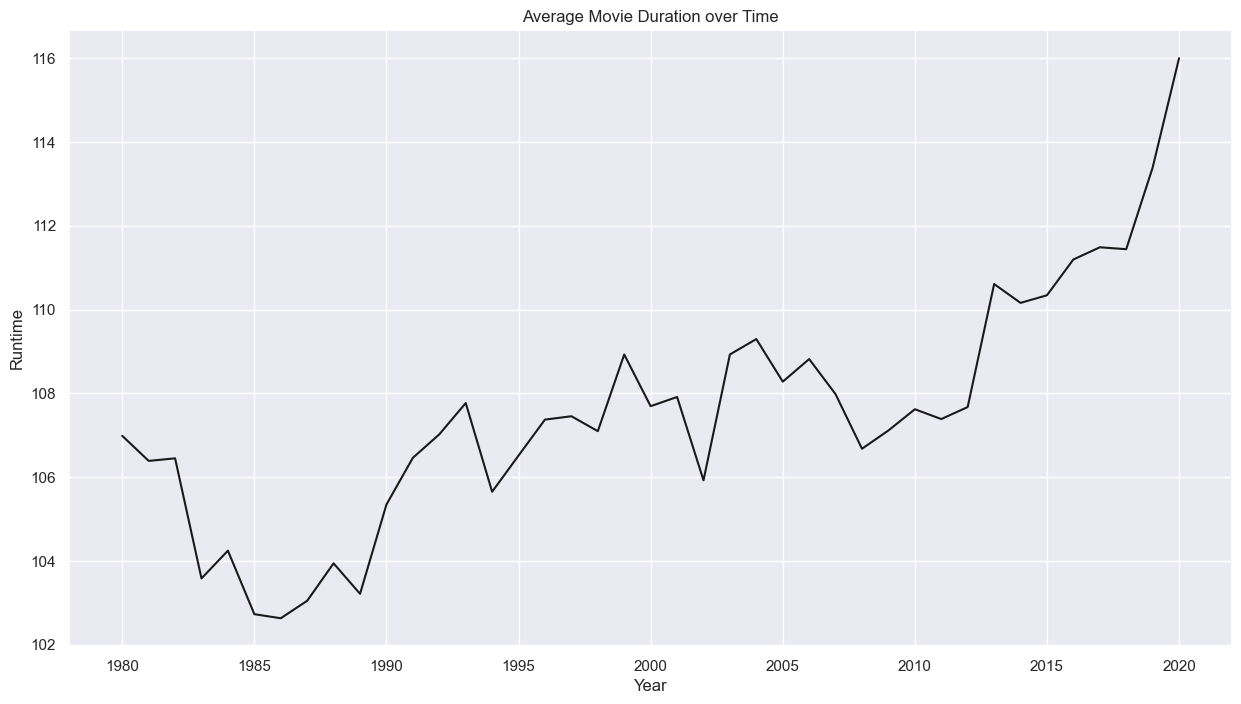

In [685]:
# plot line graph
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.lineplot(data=df, x= "Year", y='Runtime', errorbar=None, color='k')
ax.set(title='Average Movie Duration over Time');

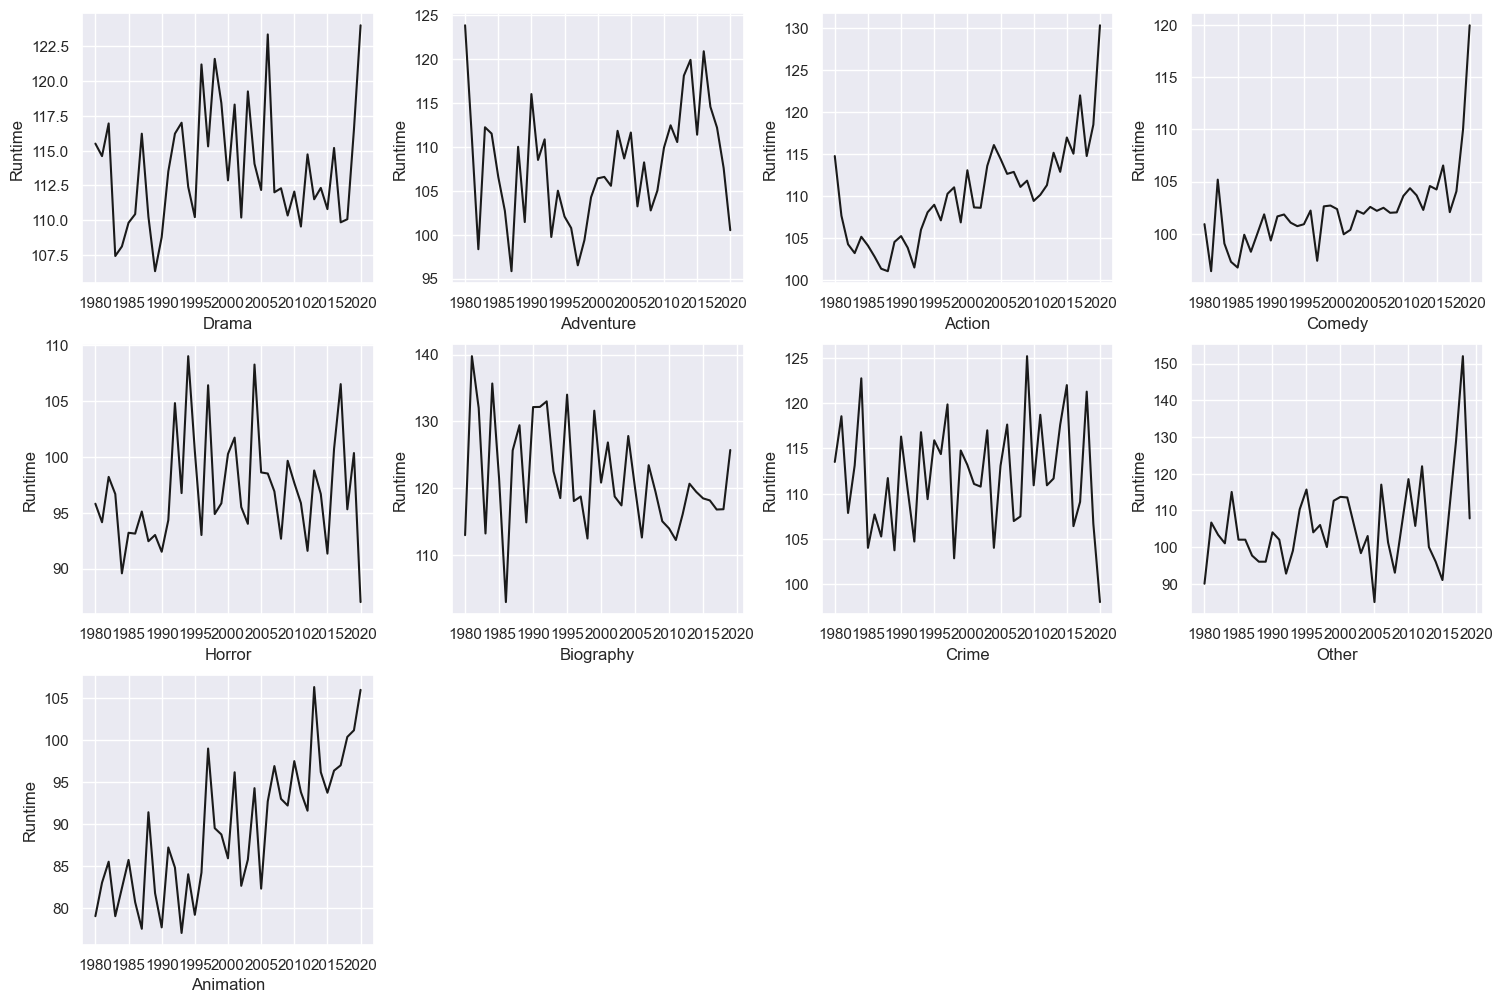

In [686]:
#Histogram with kernel density function of all numerical features to understand spread
plt.figure(figsize = (15,10))
for i in enumerate(df['Genre'].unique()):
    plt.subplot(3, 4, i[0]+1)
    sns.lineplot(data=(df[df['Genre'] == i[1]]), x= 'Year', y='Runtime', errorbar=None, color ='k')
    plt.tight_layout(pad=0.5)
    plt.gca().set(xlabel= i[1],ylabel='Runtime') 
#plt.title('Histplot for all numerical features', x=-0.5 ,y=3.50)    

# How did move revenue change over time?

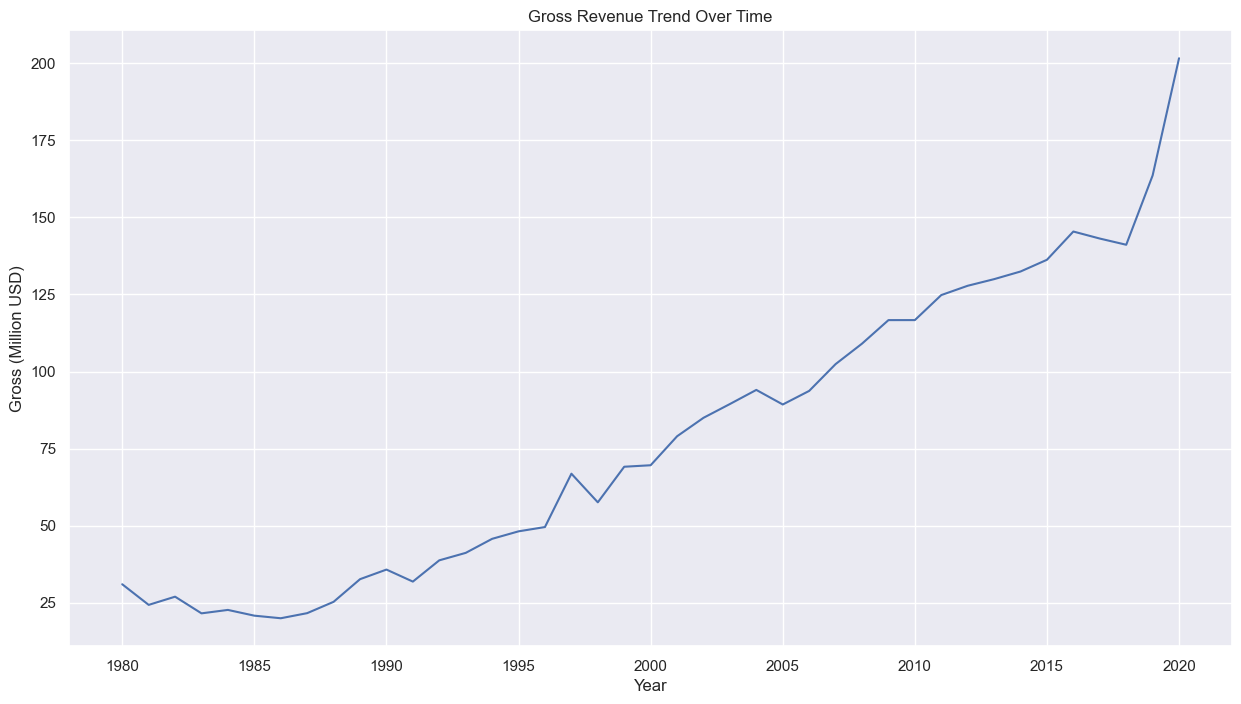

In [687]:
# plot line graph
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.lineplot(data=df, x= 'Year', y='Gross (Million USD)', errorbar=None)
ax.set(title='Gross Revenue Trend Over Time');

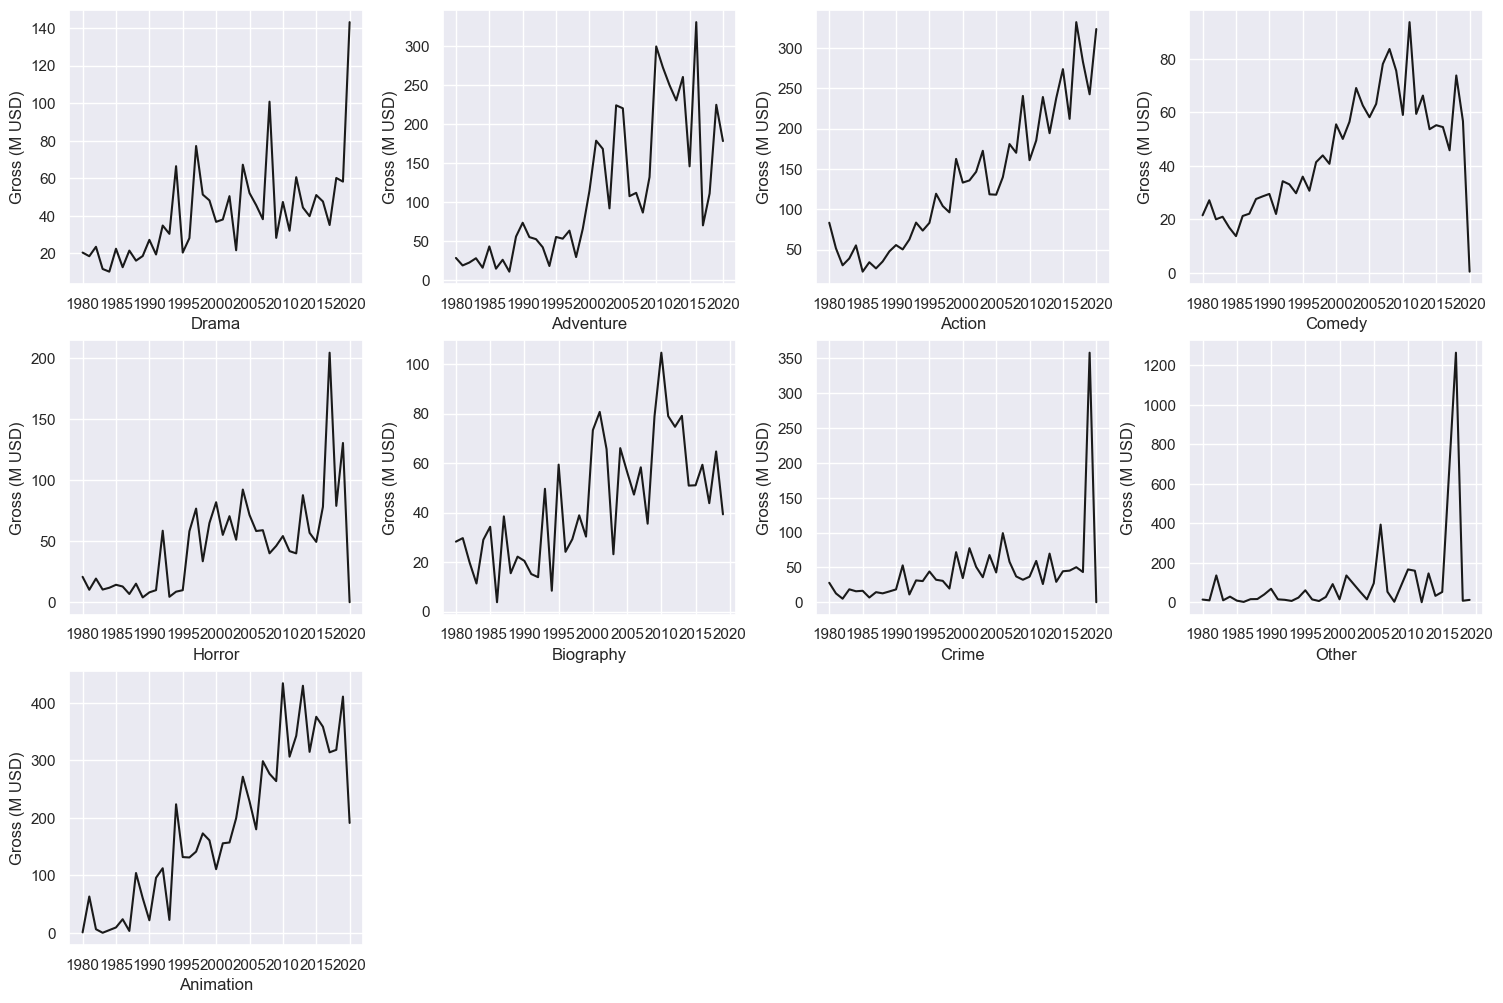

In [688]:
#Histogram with kernel density function of all numerical features to understand spread
plt.figure(figsize = (15,10))
for i in enumerate(df['Genre'].unique()):
    plt.subplot(3, 4, i[0]+1)
    sns.lineplot(data=(df[df['Genre'] == i[1]]), x= 'Year', y='Gross (Million USD)', errorbar=None, color ='k')
    plt.tight_layout(pad=0.5)
    plt.gca().set(xlabel= i[1],ylabel='Gross (M USD)') 
#plt.title('Histplot for all numerical features', x=-0.5 ,y=3.50)    

# Which movie to watch tonight?

In [710]:
def movie_picker(genre,min_score, max_score):
    if genre in ['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography','Crime', 'Other', 'Animation']:
            """Return the top 5 best and worst movies for given genre and IMDB score range"""
            
            df_temp = df.copy()
            df_temp = df_temp[df_temp.Score >= min_score]
            df_temp = df_temp[df_temp.Score <= max_score]

            df_temp['Year'] = df_temp['Year'].dt.year

            best= df_temp[['Movie','Year', 'Genre', 'Score', 'Runtime']][df_temp['Genre']==genre].sort_values(by='Score', ascending = False).head(5)
            worst = df_temp[['Movie','Year', 'Genre', 'Score', 'Runtime']][df_temp['Genre']==genre].sort_values(by='Score').head(5)
            #combine best and worst
            best = pd.concat([best, worst])
            print('The top 5 best and worst rated movies are:')
            return(best.style.hide())
    
    else:
            print('Please check that genre is from following list: Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Horror, Other')

    

In [711]:
#Pick a Movie for Tonight
movie_picker('Animation',6,10)

The top 5 best and worst rated movies are:


Movie,Year,Genre,Score,Runtime
Spirited Away,2001,Animation,8.600000,125.000000
The Lion King,1994,Animation,8.500000,88.000000
Princess Mononoke,1997,Animation,8.400000,134.000000
Coco,2017,Animation,8.400000,105.000000
Spider-Man: Into the Spider-Verse,2018,Animation,8.400000,117.000000
The Lego Ninjago Movie,2017,Animation,6.000000,101.000000
My Little Pony: The Movie,1986,Animation,6.000000,86.000000
Arthur and the Invisibles,2006,Animation,6.000000,94.000000
Planet 51,2009,Animation,6.000000,91.000000
Smurfs: The Lost Village,2017,Animation,6.000000,90.000000
